In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding & preprocessing the train data

In [2]:
df = pd.read_csv("loan_train.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,573354,737474,10000,10000,9950.00000,36 months,7.51%,311.11,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,476321,603324,15000,15000,14800.00000,36 months,8.94%,476.58,A,A5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,451484,556265,2000,2000,2000.00000,36 months,13.57%,67.94,C,C3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1018129,1246557,35000,35000,33951.84413,60 months,20.89%,944.71,F,F1,...,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN
4,800018,1005270,14000,14000,14000.00000,60 months,17.49%,351.64,D,D5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,2.499900e+04,2.499900e+04,24999.000000,24999.000000,24999.00000,24999.000000,2.499900e+04,24999.000000,24999.000000,24999.000000,...,0.0,0.0,0.0,0.0,24582.000000,24982.0,0.0,0.0,0.0,0.0
mean,6.824732e+05,8.498388e+05,11262.498500,10985.099404,10435.34441,325.506824,6.994135e+04,13.330210,0.145406,0.868635,...,NaN,NaN,NaN,NaN,0.041656,0.0,NaN,NaN,NaN,NaN
std,2.094886e+05,2.642564e+05,7391.976258,7123.122668,7064.11343,206.995053,6.939411e+04,6.651602,0.494811,1.070605,...,NaN,NaN,NaN,NaN,0.200822,0.0,NaN,NaN,NaN,NaN
min,5.574200e+04,7.367300e+04,500.000000,500.000000,0.00000,16.080000,4.080000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.165330e+05,6.672200e+05,5562.500000,5500.000000,5000.00000,168.640000,4.200000e+04,8.220000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.647370e+05,8.496710e+05,10000.000000,10000.000000,9000.00000,283.200000,6.000000e+04,13.420000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.355255e+05,1.044732e+06,15000.000000,15000.000000,14400.00000,431.250000,8.400000e+04,18.570000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.076863e+06,1.304884e+06,35000.000000,35000.000000,35000.00000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
corr_1 = df.corr()
# Finding correlation of remaining columns
corr_1.shape

(87, 87)

<AxesSubplot:title={'center':'CORRELATION MATRIX'}>

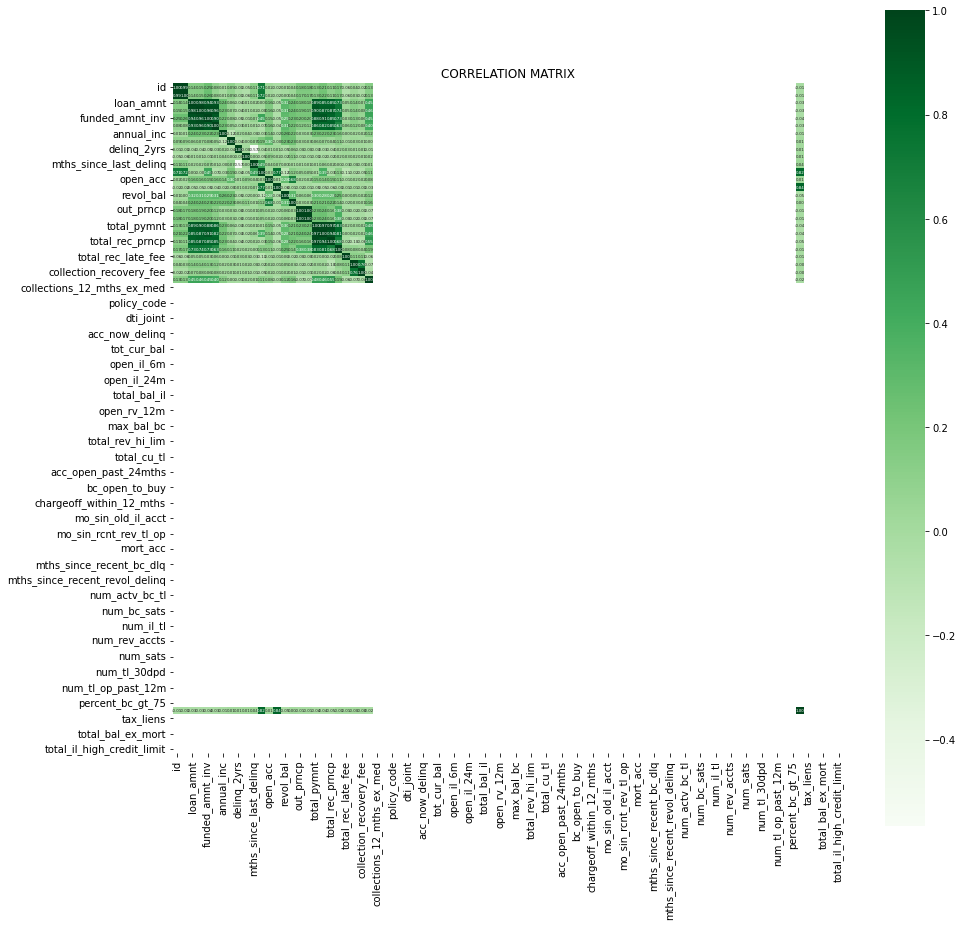

In [7]:
plt.figure(figsize=(15,15))
plt.title("CORRELATION MATRIX")
sns.heatmap(corr_1, cbar=True, square= True, fmt='.2f',annot=True,annot_kws={'size':4}, cmap='Greens')

In [8]:
a=df.isna().any()
a

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
                              ...  
tax_liens                      True
tot_hi_cred_lim                True
total_bal_ex_mort              True
total_bc_limit                 True
total_il_high_credit_limit     True
Length: 111, dtype: bool

In [9]:
a.value_counts()

True     67
False    44
dtype: int64

In [10]:
b=df.iloc[:,55:]

In [11]:
b.describe()
b.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   verification_status_joint       0 non-null      float64
 1   acc_now_delinq                  24999 non-null  int64  
 2   tot_coll_amt                    0 non-null      float64
 3   tot_cur_bal                     0 non-null      float64
 4   open_acc_6m                     0 non-null      float64
 5   open_il_6m                      0 non-null      float64
 6   open_il_12m                     0 non-null      float64
 7   open_il_24m                     0 non-null      float64
 8   mths_since_rcnt_il              0 non-null      float64
 9   total_bal_il                    0 non-null      float64
 10  il_util                         0 non-null      float64
 11  open_rv_12m                     0 non-null      float64
 12  open_rv_24m                     

In [12]:
c=df.drop(df.columns.to_series()["annual_inc_joint":"bc_util"], axis=1)
d=c.drop(c.columns.to_series()["mo_sin_old_il_acct":"percent_bc_gt_75"], axis=1)
e=d.drop(['id','member_id','title','desc','mths_since_last_major_derog','emp_title','application_type','policy_code','issue_d','url','zip_code','earliest_cr_line','revol_bal','initial_list_status','out_prncp_inv','last_pymnt_d','next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','chargeoff_within_12_mths','delinq_amnt','tax_liens','mths_since_last_record','mths_since_last_delinq','pub_rec_bankruptcies','out_prncp','pymnt_plan'],axis=1)
f=e.drop(e.columns.to_series()["tot_hi_cred_lim":"total_il_high_credit_limit"], axis=1)
f

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,10000,10000,9950.00000,36 months,7.51%,311.11,A,A4,10+ years,RENT,...,1.20%,48,2247.210000,2235.98,1509.91,350.87,0.0,386.43,3.96,311.11
1,15000,15000,14800.00000,36 months,8.94%,476.58,A,A5,1 year,RENT,...,14%,17,15112.760000,14911.26,15000.00,112.76,0.0,0.00,0.00,15114.03
2,2000,2000,2000.00000,36 months,13.57%,67.94,C,C3,4 years,OWN,...,34.40%,10,2354.966827,2354.97,2000.00,354.97,0.0,0.00,0.00,101.78
3,35000,35000,33951.84413,60 months,20.89%,944.71,F,F1,10+ years,MORTGAGE,...,91.40%,21,50974.920000,48442.03,29644.65,21330.27,0.0,0.00,0.00,944.71
4,14000,14000,14000.00000,60 months,17.49%,351.64,D,D5,5 years,MORTGAGE,...,9.40%,27,20804.230020,20804.23,14000.00,6804.23,0.0,0.00,0.00,3943.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,5500,5500,5500.00000,36 months,14.96%,190.55,D,D2,7 years,MORTGAGE,...,58.20%,37,6825.066783,6825.07,5500.00,1325.07,0.0,0.00,0.00,1122.20
24995,11450,11450,11450.00000,36 months,8.49%,361.40,A,A5,7 years,RENT,...,34%,15,13010.206030,13010.21,11450.00,1560.21,0.0,0.00,0.00,382.90
24996,24000,24000,21100.31424,60 months,20.53%,642.96,G,G2,10+ years,MORTGAGE,...,77.20%,24,33765.068310,26978.96,24000.00,9765.07,0.0,0.00,0.00,16500.39
24997,14000,14000,11411.12089,36 months,17.58%,503.19,F,F2,10+ years,MORTGAGE,...,95%,26,17917.012900,14191.06,14000.00,3917.01,0.0,0.00,0.00,3857.88


In [13]:
f.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                24999 non-null  int64  
 1   funded_amnt              24999 non-null  int64  
 2   funded_amnt_inv          24999 non-null  float64
 3   term                     24999 non-null  object 
 4   int_rate                 24999 non-null  object 
 5   installment              24999 non-null  float64
 6   grade                    24999 non-null  object 
 7   sub_grade                24999 non-null  object 
 8   emp_length               24958 non-null  object 
 9   home_ownership           24999 non-null  object 
 10  annual_inc               24999 non-null  float64
 11  verification_status      24999 non-null  object 
 12  loan_status              24999 non-null  object 
 13  purpose                  24999 non-null  object 
 14  addr_state            

In [14]:
f.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,24999.000000,24999.000000,24999.00000,24999.000000,2.499900e+04,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000
mean,11262.498500,10985.099404,10435.34441,325.506824,6.994135e+04,13.330210,0.145406,0.868635,9.360734,0.052922,22.171447,12232.986079,11641.755970,9853.803259,2280.454298,1.351415,97.377186,12.009085,2705.466391
std,7391.976258,7123.122668,7064.11343,206.995053,6.939411e+04,6.651602,0.494811,1.070605,4.394021,0.234017,11.340689,8988.113395,8879.737938,7022.604905,2596.955489,7.380823,709.429724,137.850851,4459.941282
min,500.000000,500.000000,0.00000,16.080000,4.080000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5562.500000,5500.000000,5000.00000,168.640000,4.200000e+04,8.220000,0.000000,0.000000,6.000000,0.000000,14.000000,5649.601459,5231.965000,4800.000000,679.970000,0.000000,0.000000,0.000000,224.125000
50%,10000.000000,10000.000000,9000.00000,283.200000,6.000000e+04,13.420000,0.000000,1.000000,9.000000,0.000000,21.000000,10086.600000,9453.530000,8002.290000,1379.950000,0.000000,0.000000,0.000000,558.560000
75%,15000.000000,15000.000000,14400.00000,431.250000,8.400000e+04,18.570000,0.000000,1.000000,12.000000,0.000000,29.000000,16568.975395,15850.810000,13750.000000,2855.105000,0.000000,0.000000,0.000000,3356.205000
max,35000.000000,35000.000000,35000.00000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,79.000000,58480.139920,58438.370000,35000.010000,23506.560000,166.429711,29623.350000,5602.720000,36115.200000


In [15]:
f['revol_util'] = pd.to_numeric(f['revol_util'].str.replace('%',''))
f = f.replace(to_replace=['10+ years','< 1 year'], value=[10, 1])
f['emp_length'] = pd.to_numeric(f['emp_length'].str.replace('years','').str.replace('year',''))
f['term'] = pd.to_numeric(df['term'].str.replace('months',''))
f['int_rate'] = pd.to_numeric(df['int_rate'].str.replace('%', ''))

In [16]:
f.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 8470
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_util                   29
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
dtype: int64

In [17]:
median = f["revol_util"].median()
f["revol_util"].fillna(median)

0         1.2
1        14.0
2        34.4
3        91.4
4         9.4
         ... 
24994    58.2
24995    34.0
24996    77.2
24997    95.0
24998    41.8
Name: revol_util, Length: 24999, dtype: float64

In [18]:
f["emp_length"].fillna(f["emp_length"].median())

0        4.0
1        1.0
2        4.0
3        4.0
4        5.0
        ... 
24994    7.0
24995    7.0
24996    4.0
24997    4.0
24998    4.0
Name: emp_length, Length: 24999, dtype: float64

In [19]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
f['grade'] = le.fit_transform(f['grade'].values)
f['sub_grade'] = le.fit_transform(f['sub_grade'].values)
# f['emp_length'] = le.fit_transform(f['emp_length'].values)
f['home_ownership'] = le.fit_transform(f['home_ownership'].values)
f['verification_status'] = le.fit_transform(f['verification_status'].values)
f['addr_state'] = le.fit_transform(f['addr_state'].values)
# f['revol_util'] = le.fit_transform(f['revol_util'].values)
f['purpose'] = le.fit_transform(f['purpose'].values)


In [20]:
f.shape

(24999, 30)

In [21]:
f.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                24999 non-null  int64  
 1   funded_amnt              24999 non-null  int64  
 2   funded_amnt_inv          24999 non-null  float64
 3   term                     24999 non-null  int64  
 4   int_rate                 24999 non-null  float64
 5   installment              24999 non-null  float64
 6   grade                    24999 non-null  int32  
 7   sub_grade                24999 non-null  int32  
 8   emp_length               16529 non-null  float64
 9   home_ownership           24999 non-null  int32  
 10  annual_inc               24999 non-null  float64
 11  verification_status      24999 non-null  int32  
 12  loan_status              24999 non-null  object 
 13  purpose                  24999 non-null  int32  
 14  addr_state            

In [22]:
k=f[f['loan_status']!="Current"]  #Dropping 'current' records as per the question

In [23]:
k.shape

(24301, 30)

In [24]:
df_tr = k.replace(to_replace=['Fully Paid','Charged Off'], value=[1, -1])   #Assigning 1 & -1 to 'fully paid' & 'Charged off'
df_tr.shape

(24301, 30)

In [25]:
from sklearn.impute import SimpleImputer        #To fill missing values in dataset.I used 'median' approach
imputer = SimpleImputer(strategy="median")
imputer.fit(df_tr)

SimpleImputer(strategy='median')

In [26]:
X = imputer.transform(df_tr)

In [27]:
dfnew = pd.DataFrame(X, columns=df_tr.columns)

In [28]:
dfnew.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,...,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000,24301.000000
mean,11108.384429,10836.688819,10275.873993,42.022468,11.976828,323.714343,1.568783,9.907082,4.063125,1.599317,...,49.163637,22.141393,11968.517641,11367.899976,9723.016746,2143.968805,1.358008,100.174160,12.354023,2771.944580
std,7295.677660,7032.562475,6965.327422,10.405459,3.698571,206.729425,1.386595,6.786898,1.878809,1.446459,...,28.256339,11.364283,8770.861953,8652.249737,6971.625050,2388.945182,7.397470,719.351788,139.801427,4505.872171
min,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5500.000000,5000.000000,36.000000,8.940000,167.780000,0.000000,4.000000,3.000000,0.000000,...,25.800000,14.000000,5598.284713,5149.520000,4700.000000,664.420000,0.000000,0.000000,0.000000,223.360000
50%,10000.000000,9600.000000,8925.000000,36.000000,11.830000,280.970000,1.000000,9.000000,4.000000,2.000000,...,49.700000,20.000000,9884.010000,9263.590000,8000.000000,1336.550000,0.000000,0.000000,0.000000,586.180000
75%,15000.000000,15000.000000,14025.000000,60.000000,14.460000,426.470000,2.000000,14.000000,5.000000,3.000000,...,72.700000,29.000000,16204.153570,15439.110000,13250.000000,2711.220000,0.000000,0.000000,0.000000,3514.260000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,6.000000,34.000000,9.000000,3.000000,...,99.900000,79.000000,58480.139920,58438.370000,35000.010000,23480.140000,166.429711,29623.350000,5602.720000,36115.200000


In [29]:
dfnew.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
dtype: int64

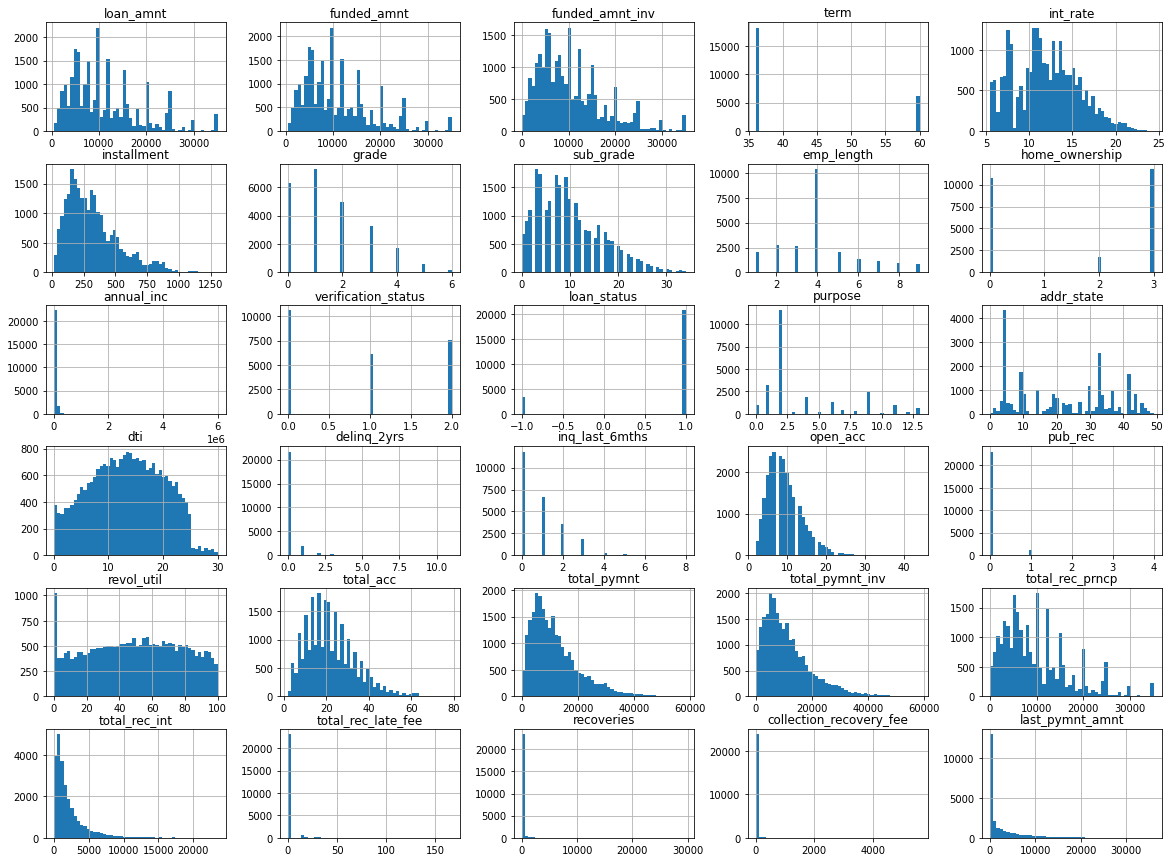

In [56]:
dfnew.hist(bins=50, figsize=(20, 15))
plt.show()

In [30]:
corr = dfnew.corr()
corr.shape

(30, 30)

### Selecting important attributes

<AxesSubplot:title={'center':'CORRELATION MATRIX'}>

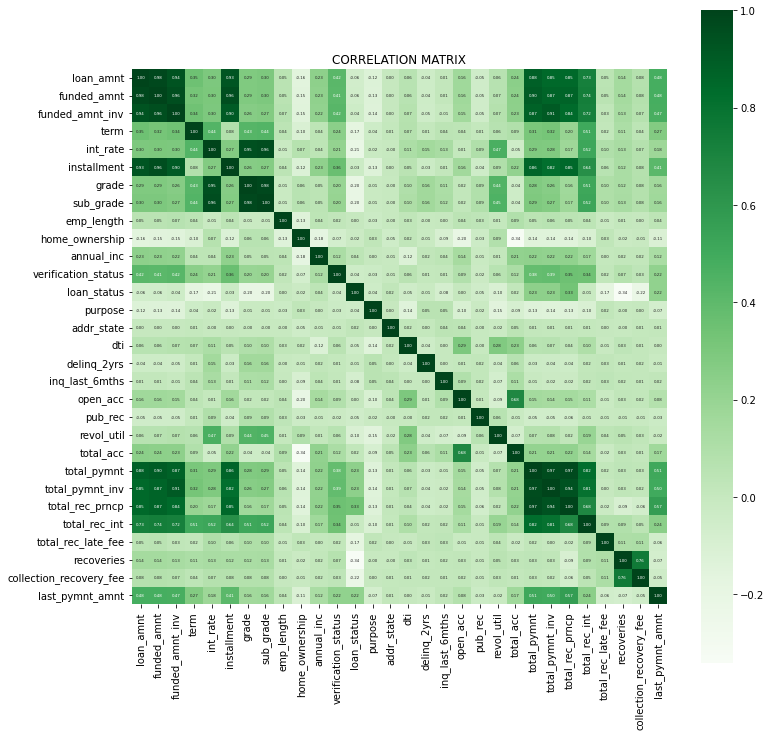

In [61]:
# Plotting a correlation matrix
plt.figure(figsize=(12,12))
plt.title("CORRELATION MATRIX")
sns.heatmap(corr, cbar=True, square= True, fmt='.2f',annot=True,annot_kws={'size':4}, cmap='Greens')

In [32]:
corr_matrix = dfnew.corr()
corr_matrix['loan_status'].sort_values(ascending=False)

loan_status                1.000000
total_rec_prncp            0.334436
total_pymnt                0.233951
total_pymnt_inv            0.230976
last_pymnt_amnt            0.221733
annual_inc                 0.040116
addr_state                 0.021916
total_acc                  0.017341
emp_length                 0.000895
open_acc                   0.000698
total_rec_int             -0.013844
delinq_2yrs               -0.013968
home_ownership            -0.023243
installment               -0.026918
funded_amnt_inv           -0.038255
purpose                   -0.040678
verification_status       -0.041628
dti                       -0.046135
pub_rec                   -0.050736
funded_amnt               -0.056209
loan_amnt                 -0.058606
inq_last_6mths            -0.075122
revol_util                -0.101273
term                      -0.169273
total_rec_late_fee        -0.170033
grade                     -0.199933
sub_grade                 -0.202964
int_rate                  -0

array([[<AxesSubplot:xlabel='loan_status', ylabel='loan_status'>,
        <AxesSubplot:xlabel='total_rec_prncp', ylabel='loan_status'>,
        <AxesSubplot:xlabel='total_pymnt', ylabel='loan_status'>,
        <AxesSubplot:xlabel='recoveries', ylabel='loan_status'>,
        <AxesSubplot:xlabel='collection_recovery_fee', ylabel='loan_status'>],
       [<AxesSubplot:xlabel='loan_status', ylabel='total_rec_prncp'>,
        <AxesSubplot:xlabel='total_rec_prncp', ylabel='total_rec_prncp'>,
        <AxesSubplot:xlabel='total_pymnt', ylabel='total_rec_prncp'>,
        <AxesSubplot:xlabel='recoveries', ylabel='total_rec_prncp'>,
        <AxesSubplot:xlabel='collection_recovery_fee', ylabel='total_rec_prncp'>],
       [<AxesSubplot:xlabel='loan_status', ylabel='total_pymnt'>,
        <AxesSubplot:xlabel='total_rec_prncp', ylabel='total_pymnt'>,
        <AxesSubplot:xlabel='total_pymnt', ylabel='total_pymnt'>,
        <AxesSubplot:xlabel='recoveries', ylabel='total_pymnt'>,
        <AxesSubplot:

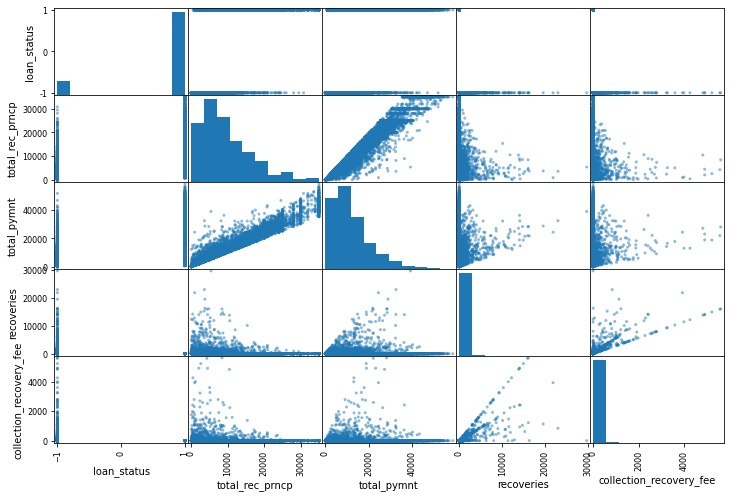

In [60]:
from pandas.plotting import scatter_matrix
attributes = ["loan_status", "total_rec_prncp","total_pymnt","recoveries","collection_recovery_fee"]
scatter_matrix(dfnew[attributes],figsize=(12, 8))

### Train-Test Split & Validation Accuracy

In [33]:
X=dfnew[['total_rec_prncp','total_pymnt','total_pymnt_inv','last_pymnt_amnt','recoveries','collection_recovery_fee','int_rate','sub_grade','grade','total_rec_late_fee','term']]
y=dfnew['loan_status']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

boost = GradientBoostingClassifier(n_estimators=100)
model = boost.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)
print('Validation Accuracy =',accuracy)

Validation Accuracy = 0.9850500617199287


### Preprocessing Test Data

In [37]:
dftest = pd.read_csv("loan_test.csv")
dftest.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1001205,1227186,4200,4200,4200.0,36 months,6.62%,128.96,A,A2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,850106,1061893,1325,1325,1325.0,36 months,13.49%,44.96,C,C2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,444243,541365,10000,10000,9975.0,36 months,8.94%,317.72,A,A5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,741007,938805,6000,6000,6000.0,60 months,16.49%,147.48,D,D3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,572468,736352,25000,25000,25000.0,36 months,15.21%,869.21,D,D2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [38]:
dftest.shape

(14718, 111)

In [39]:
u=dftest.drop(dftest.columns.to_series()["annual_inc_joint":"bc_util"], axis=1)
v=u.drop(c.columns.to_series()["mo_sin_old_il_acct":"percent_bc_gt_75"], axis=1)
w=v.drop(['id','member_id','title','desc','mths_since_last_major_derog','emp_title','application_type','policy_code','issue_d','url','zip_code','earliest_cr_line','revol_bal','initial_list_status','out_prncp_inv','last_pymnt_d','next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','chargeoff_within_12_mths','delinq_amnt','tax_liens','mths_since_last_record','mths_since_last_delinq','pub_rec_bankruptcies','out_prncp','pymnt_plan'],axis=1)
n=w.drop(e.columns.to_series()["tot_hi_cred_lim":"total_il_high_credit_limit"], axis=1)
n

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,4200,4200,4200.0,36 months,6.62%,128.96,A,A2,6 years,RENT,...,11.60%,15,4642.374867,4642.37,4200.00,442.37,0.00000,0.0,0.000,132.82
1,1325,1325,1325.0,36 months,13.49%,44.96,C,C2,< 1 year,RENT,...,11.90%,3,1476.640000,1476.64,1145.61,287.60,14.93661,28.5,0.285,44.96
2,10000,10000,9975.0,36 months,8.94%,317.72,A,A5,4 years,MORTGAGE,...,46.40%,45,10287.347790,10261.63,10000.00,287.35,0.00000,0.0,0.000,9337.10
3,6000,6000,6000.0,60 months,16.49%,147.48,D,D3,10+ years,RENT,...,60.20%,24,8848.343924,8848.34,6000.00,2848.34,0.00000,0.0,0.000,147.02
4,25000,25000,25000.0,36 months,15.21%,869.21,D,D2,4 years,RENT,...,55.70%,44,31293.587380,31293.59,25000.00,6293.59,0.00000,0.0,0.000,960.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14713,5400,5400,200.0,36 months,7.75%,168.60,A,A3,< 1 year,RENT,...,16.50%,4,6069.341452,224.80,5400.00,669.34,0.00000,0.0,0.000,169.09
14714,3000,3000,950.0,36 months,8.70%,94.98,B,B1,< 1 year,MORTGAGE,...,7.80%,13,3419.144850,1082.73,3000.00,419.14,0.00000,0.0,0.000,97.45
14715,5000,5000,150.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,26.30%,39,5645.957239,169.38,5000.00,645.96,0.00000,0.0,0.000,157.31
14716,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,19.40%,20,5272.161128,1397.12,5000.00,272.16,0.00000,0.0,0.000,0.00


In [40]:
n['revol_util'] = pd.to_numeric(n['revol_util'].str.replace('%',''))
n = n.replace(to_replace=['10+ years','< 1 year'], value=[10, 1])
n['emp_length'] = pd.to_numeric(n['emp_length'].str.replace('years','').str.replace('year',''))
n['term'] = pd.to_numeric(n['term'].str.replace('months',''))
n['int_rate'] = pd.to_numeric(n['int_rate'].str.replace('%', ''))

In [41]:
n.shape

(14718, 30)

In [42]:
from sklearn import preprocessing
ne = preprocessing.LabelEncoder()
n['grade'] = ne.fit_transform(n['grade'].values)
n['sub_grade'] = ne.fit_transform(n['sub_grade'].values)
# f['emp_length'] = le.fit_transform(f['emp_length'].values)
n['home_ownership'] = ne.fit_transform(n['home_ownership'].values)
n['verification_status'] = ne.fit_transform(n['verification_status'].values)
n['addr_state'] = ne.fit_transform(n['addr_state'].values)
# f['revol_util'] = le.fit_transform(f['revol_util'].values)
n['purpose'] = ne.fit_transform(n['purpose'].values)

In [43]:
n.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14718 entries, 0 to 14717
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                14718 non-null  int64  
 1   funded_amnt              14718 non-null  int64  
 2   funded_amnt_inv          14718 non-null  float64
 3   term                     14718 non-null  int64  
 4   int_rate                 14718 non-null  float64
 5   installment              14718 non-null  float64
 6   grade                    14718 non-null  int32  
 7   sub_grade                14718 non-null  int32  
 8   emp_length               8651 non-null   float64
 9   home_ownership           14718 non-null  int32  
 10  annual_inc               14718 non-null  float64
 11  verification_status      14718 non-null  int32  
 12  loan_status              14718 non-null  object 
 13  purpose                  14718 non-null  int32  
 14  addr_state            

In [44]:
m=n[n['loan_status']!="Current"]

In [45]:
m.shape

(14276, 30)

In [46]:
dftest_tr = m.replace(to_replace=['Fully Paid','Charged Off'], value=[1, -1])
dftest_tr.shape

(14276, 30)

In [47]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(dftest_tr)

SimpleImputer(strategy='median')

In [48]:
Z = imputer.transform(dftest_tr)

In [49]:
dftestnew = pd.DataFrame(Z, columns=dftest_tr.columns)

### Calculate Test Accuracy

In [50]:
X1=dftestnew[['total_rec_prncp','total_pymnt','total_pymnt_inv','last_pymnt_amnt','recoveries','collection_recovery_fee','int_rate','sub_grade','grade','total_rec_late_fee','term']]
y1=dftestnew['loan_status']

In [51]:
y_pred1 = model.predict(X1)

In [52]:
from sklearn.metrics import accuracy_score
Test_accuracy = accuracy_score(y1, y_pred1)
print('Test Accuracy =',Test_accuracy)

Test Accuracy = 0.9811571868870832
